In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Normal Distribution have a bell-shaped curve

The mean, median, mode of a normal distribution are eqaul . The area under the normation curve is equal to 1.0
An important condition for most common statistical tests

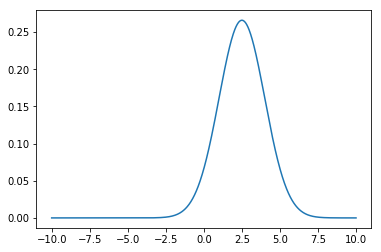

In [9]:
import pylab
from scipy.stats import norm
x = np.linspace(-10,10,1000)
y = norm.pdf(x, loc=2.5,scale = 1.5)
pylab.plot(x,y)
pylab.show()

Right Skewed histogram

Right protuding tail

Mean > Median

In [10]:
from scipy.stats import skewnorm

No handles with labels found to put in legend.


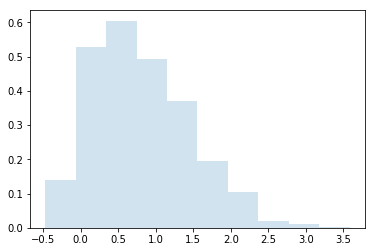

In [11]:
a =4
fig, ax = plt.subplots(1,1)
r = skewnorm.rvs(a,size = 1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha =0.2)
ax.legend(loc='best', frameon = False)
plt.show()

Check for data normality using other techniques

In [12]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [14]:
i = sns.load_dataset("iris")

In [15]:
i.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [17]:
s1 = i["sepal_length"]

In [18]:
s1.head(3)

0    5.1
1    4.9
2    4.7
Name: sepal_length, dtype: float64

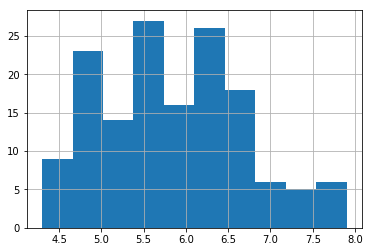

In [19]:
s1.hist()

Shapiro-Wilks Test

Test for Normality

H0: The data are normally distributed

Accept H0 is p>0.05

In [20]:
shapiro_results = scipy.stats.shapiro(s1)

In [21]:
print(shapiro_results)   # test statistic and p-value

(0.9760899543762207, 0.010180278681218624)


Standard Normal Distribution and Z-scores

Z-score is a standard score  , z = (value-mean)/standard devaition

standard normal distribution or the unit normal distribution is a special normal curve made up of z-scores

std normal distribution have a mean of 0 and sd= 1

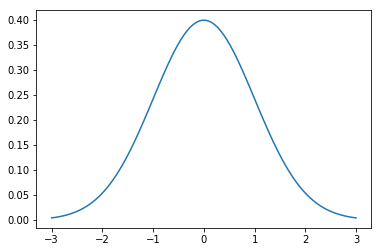

In [26]:
import math
import matplotlib.mlab as mlab

mu =0
variance =1 
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x,mu,sigma))

plt.show()

In [31]:
def standradize(x,mean,stdev):
    return(x - mean /stdev)

If the population mean and sd are 40 nad 10respectively for class scores , what do we say about the performance of a student who scored 65 ?

In [ ]:
print standradize(65,40,10)

In [42]:
import scipy.stats as st

In [43]:
a = np.array([0.7972, 0.0767,0.7866,0.8091,0.1954,0.6307,0.6599,0.1065,0.0508])

In [44]:
from scipy import stats

In [47]:
stats.zscore(a)

array([ 1.06373812, -1.18904931,  1.0305951 ,  1.10094585, -0.81791001,
        0.54314255,  0.63444219, -1.09587365, -1.27003085])

In [48]:
import pandas as pd

In [50]:
 df = pd.DataFrame(np.random.randint(100,200, size=(5,3)) , columns=['A','B','C'])

In [51]:
df

,A,B,C
0,125,102,100
1,188,197,110
2,110,114,118
3,172,148,194
4,134,135,170


In [52]:
# compute z scores of the dataframe

In [53]:
from scipy.stats import zscore

In [54]:
df.apply(zscore)

,A,B,C
0,-0.707565,-1.126260,-1.042248
1,1.435540,1.749941,-0.770829
2,-1.217828,-0.762950,-0.553694
3,0.891260,0.266427,1.509088
4,-0.401407,-0.127158,0.857683


Confidence Interval :

A confidence interval is a range of values above and below a point estimate that captures the true population paramaeter at some predetermind confidence level

if you want to have a 95% chance of capturing the true population parameter witha point estimate and a corrsponding confidence intervel , you'd set your confidence level to 95%

CI = MEan +- Margin of error

where MOE is Z* sd/sqrt(n)

In [57]:
%matplotlib inline

import numpy as np
import pandas as pd
import random 
import math

In [59]:
np.random.seed(10)

population_wt = stats.poisson.rvs(loc =18, mu = 35, size =150000) # randomly create population weight data for 150k people

sample_size = 1000
sample = np.random.choice(a = population_wt, size = sample_size)
sample_mean = sample.mean()  # sample of 1000 people

z_critical = stats.norm.ppf(q = 0.975)

print("z_critical_value:")  # check the z_critical value
print(z_critical)

pop_stdev = population_wt.std()  # get the population standard deviation 

margin_of_error = z_critical *(pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print("confidence_interval:")
print(confidence_interval)

z_critical_value:
1.959963984540054
confidence_interval:
(52.66699057434821, 53.39900942565179)


In [60]:
s_stdev = sample.std()

In [61]:
from scipy.stats  import t 
from numpy import average, std
from math import sqrt


The major difference  between using Z score and a T statistic is that former need population standard devaition
the T test is also used if you have a small sample size

In [62]:
data = [63.5,81.3,88.9,63.5, 76.2, 67.3,66.0, 64.8, 74.9, 81.3, 76.2, 72.4, 76.2, 81.3, 71.1,80.0, 73.7, 74.9,76.2,86.4,
       73.7,81.3,68.6,71.1,83.8,71.1,68.6,81.3, 73.7, 74.9]

In [63]:
mean = average(data)

In [64]:
mean

74.80666666666666

In [65]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95

In [70]:
n = len(data)
m= mean(data)
std_err = sem(data) # standard error
h = std_err * t.ppf((1 + confidence) / 2, n - 1) # MOE(Margin Of Error)

start = m - h
print (start)

72.32885969182384


In [71]:
end = m + h
print(end)

77.28447364150948
